In [2]:
# Inclusao de bibliotecas necessarias

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML
import math

In [3]:
# Constantes que serao utilizadas

T = 1
N = 10
M = 20
lamda = 5/9

In [4]:
# Solução exata de u(x, 0)

def f(x):
    x = np.asarray(x) 
    return np.where(x <= 1 / 2, 2 * x, 2 - 2 * x)

In [5]:
# Aproximacao de Fourier
def fourier_approx(M, lamda, N, f):

    fourier_calor = np.zeros((M+1, N+1))
    malha_x = np.linspace(0, 1, num=M + 1)

    dx = 1/M
    dt = lamda * dx**2

    fourier_calor[:, 0] = f(malha_x)

    t = 0

    for j in range(1, N+1):
        t += dt
        u = np.zeros_like(malha_x)

        for m in range(1, 21):
            u += (8 * np.sin((np.pi * (2 * m - 1) / 2))) / (np.pi**2 * (2 * m - 1)**2) \
                * np.exp(-(2 * m - 1)**2 * np.pi**2 * t) \
                * np.sin((2 * m - 1) * np.pi * malha_x)
        
        fourier_calor[:,j] = u
        
    return fourier_calor

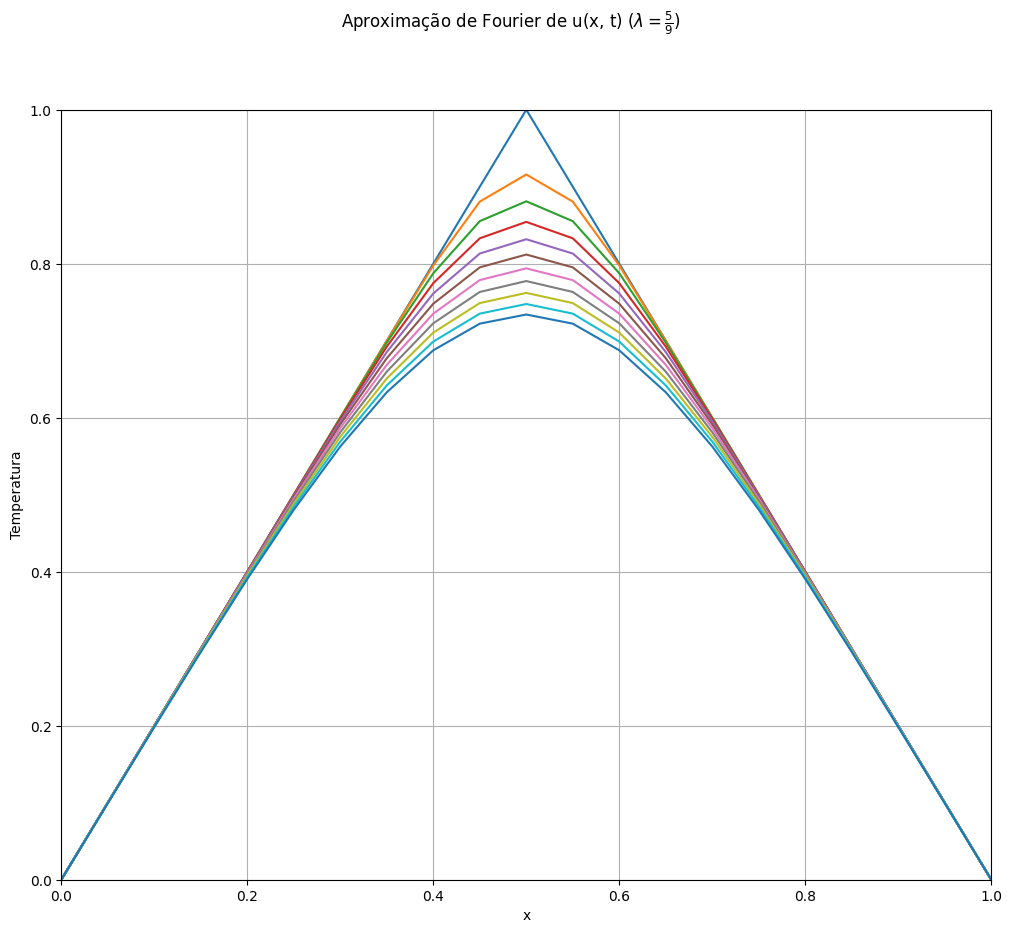

In [6]:
malha_x = np.linspace(0, 1, num=M + 1)
figsize = (12, 10)

fig, ax = plt.subplots(figsize=figsize)
fig.suptitle(r'Aproximação de Fourier de u(x, t) ($\lambda = \frac{5}{9}$)')

lamda = 5/9

sol_Fourier = fourier_approx(M, lamda, N, f)

for j in range(N+1):
    ax.plot(malha_x, sol_Fourier[:,j], color='C'+str(j))

ax.set_ylabel('Temperatura')
ax.set_xlabel('x')
ax.set_xlim((0,1))
ax.set_ylim((0,1))
ax.grid(True)

In [7]:
def u_mlinhas(M, T, N, f):

    mol_calor = np.zeros((M+1,N+1))

    dx = 1 / M 
    malha_x = np.linspace(0, 1, num=M + 1)
    
    mol_calor[:,0] = f(malha_x)

    # Arranjo de autovalores
    theta = np.array([m*np.pi/M for m in range(1,M)], dtype=float)
    l_autovalores = -4*(np.sin(theta/2))**2

    # Arranjo de autovetores
    P = np.array([np.sqrt(2/M)*np.sin(j*theta) for j in range(1,M)], dtype=float)

    #Método das linhas
    for j in range(1,N+1):
        t = j*T/N
        exponencial_t = np.dot(np.dot(P,np.diag(np.exp((t/(dx)**2)*l_autovalores))),P.transpose())
        produto = np.dot(exponencial_t,mol_calor[1:-1,0])  

        mol_calor[:,j] = np.insert(np.insert(produto, 0, 0), M, 0)
        
    return mol_calor

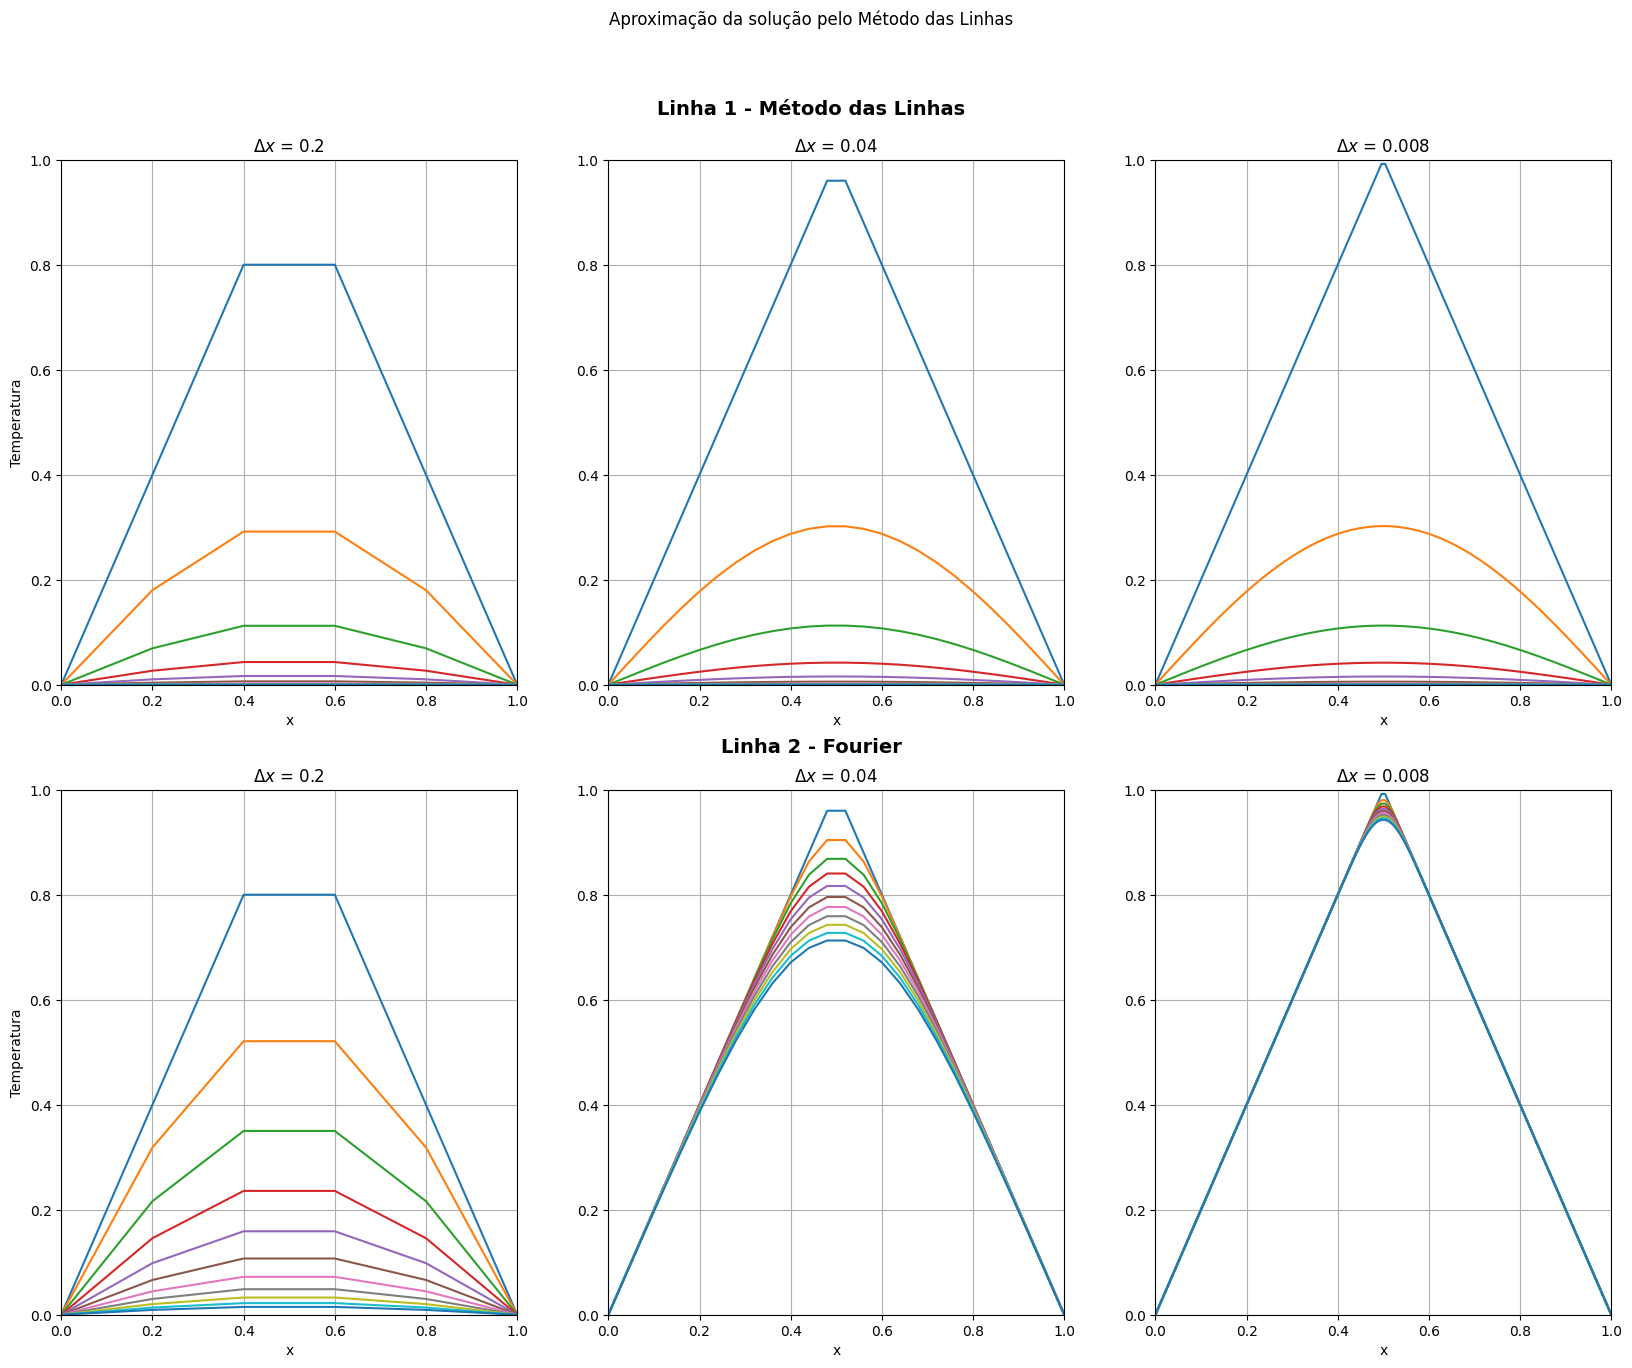

In [8]:
M1 = 5
M2 = 25
M3 = 125

malha_1 = np.linspace(0, 1, num=M1 + 1)
malha_2 = np.linspace(0, 1, num=M2 + 1)
malha_3 = np.linspace(0, 1, num=M3 + 1)

figsize = (20, 15)
fig, axs = plt.subplots(2,3, figsize=figsize)
fig.suptitle('Aproximação da solução pelo Método das Linhas')
axs[0][0].set_ylabel('Temperatura')

axs[0][0].set_xlabel('x')
axs[0][1].set_xlabel('x')
axs[0][2].set_xlabel('x')

axs[0][0].set_xlim((0,1))
axs[0][0].set_ylim((0,1))

axs[0][1].set_xlim((0,1))
axs[0][1].set_ylim((0,1))

axs[0][2].set_xlim((0,1))
axs[0][2].set_ylim((0,1))
fig.text(0.5, 0.91, 'Linha 1 - Método das Linhas', ha='center', fontsize=14, fontweight='bold')

axs[0][0].set_title(r'$\Delta x$ = 0.2')
axs[0][1].set_title(r'$\Delta x$ = 0.04')
axs[0][2].set_title(r'$\Delta x$ = 0.008')

sol1_MOL = u_mlinhas(M1, T, N, f)
sol2_MOL = u_mlinhas(M2, T, N, f)
sol3_MOL = u_mlinhas(M3, T, N, f)

for j in range(N+1):
    axs[0][0].plot(malha_1, sol1_MOL[:,j], color='C'+str(j))
    axs[0][1].plot(malha_2, sol2_MOL[:,j], color='C'+str(j))
    axs[0][2].plot(malha_3, sol3_MOL[:,j], color='C'+str(j))

axs[0][0].grid(True)
axs[0][1].grid(True)
axs[0][2].grid(True)


axs[1][0].set_ylabel('Temperatura')

axs[1][0].set_xlabel('x')
axs[1][1].set_xlabel('x')
axs[1][2].set_xlabel('x')

axs[1][0].set_xlim((0,1))
axs[1][0].set_ylim((0,1))

axs[1][1].set_xlim((0,1))
axs[1][1].set_ylim((0,1))

axs[1][2].set_xlim((0,1))
axs[1][2].set_ylim((0,1))

fig.text(0.5, 0.485, 'Linha 2 - Fourier', ha='center', fontsize=14, fontweight='bold')

axs[1][0].set_title(r'$\Delta x$ = 0.2')
axs[1][1].set_title(r'$\Delta x$ = 0.04')
axs[1][2].set_title(r'$\Delta x$ = 0.008')

sol1_MOL = fourier_approx(M1, T, N, f)
sol2_MOL = fourier_approx(M2, T, N, f)
sol3_MOL = fourier_approx(M3, T, N, f)

for j in range(N+1):
    axs[1][0].plot(malha_1, sol1_MOL[:,j], color='C'+str(j))
    axs[1][1].plot(malha_2, sol2_MOL[:,j], color='C'+str(j))
    axs[1][2].plot(malha_3, sol3_MOL[:,j], color='C'+str(j))

axs[1][0].grid(True)
axs[1][1].grid(True)
axs[1][2].grid(True)

In [9]:
def Thomas(a, b, c1, d1):
    nmax = len(d1)
    
    #copias de c e d
    c = c1.copy()
    d = d1.copy()

    # Modifica o primeiro coeficiente de cada linha
    c[0] /= b[0]
    d[0] /= b[0]

    for i in range(1, nmax):
        ptemp = b[i] - a[i] * c[i-1]
        c[i] /= ptemp
        d[i] = (d[i] - a[i] * d[i-1])/ptemp

    #Substituição de volta
    v = [0 for i in range(nmax)]
    v[-1] = d[-1]
    for i in range(-2,-nmax-1,-1):
        v[i] = d[i] - c[i] * v[i+1]
    return v

In [10]:
def u_DP(lamda, M, N):
    malha_x = np.linspace(0, 1, num=M + 1)

    DP_calor = np.zeros([M + 1, N + 1])
    DP_calor[:,0] = f(malha_x)

    # Cálculo das aproximações para cada j
    for j in range(N):
        DP_calor[1:-1,j+1] = DP_calor[1:-1,j] + lamda * (DP_calor[2:,j] - 2 * DP_calor[1:-1,j] + DP_calor[:-2,j])

    return DP_calor

In [11]:
def u_DR(lamda, M, N):
    DR_calor = np.zeros([M + 1, N + 1])
    DR_calor[:,0] = f(malha_x)

    # Matriz A_{DR}
    alfa = -lamda * np.ones(M-1)
    alfa[0] = 0
    beta = (1+2*lamda)*np.ones(M-1)
    gamma = -lamda * np.ones(M-1)
    gamma[-1] = 0

    # Cálculo das aproximações para cada j
    for j in range(N):
        DR_calor[1:-1,j+1] = Thomas(alfa, beta, gamma, DR_calor[1:-1,j])
    
    return DR_calor

In [12]:
def u_CN(lamda, M, N):
    CN_calor = np.zeros([M + 1, N + 1])
    CN_calor[:,0] = f(malha_x)

    # Matriz 2I-lambda A
    alfa2 = -lamda * np.ones(M-1)
    alfa2[0] = 0
    beta2 = 2*(1+lamda)*np.ones(M-1)
    gamma2 = -lamda * np.ones(M-1)
    gamma2[-1] = 0

    # Cálculo das aproximações para cada j
    for j in range(N):    
        delta2 = 2*CN_calor[1:-1,j] + lamda * (CN_calor[2:,j] - 2 * CN_calor[1:-1,j] + CN_calor[:-2,j])
        CN_calor[1:-1,j+1] = Thomas(alfa2, beta2, gamma2, delta2)  

    return CN_calor

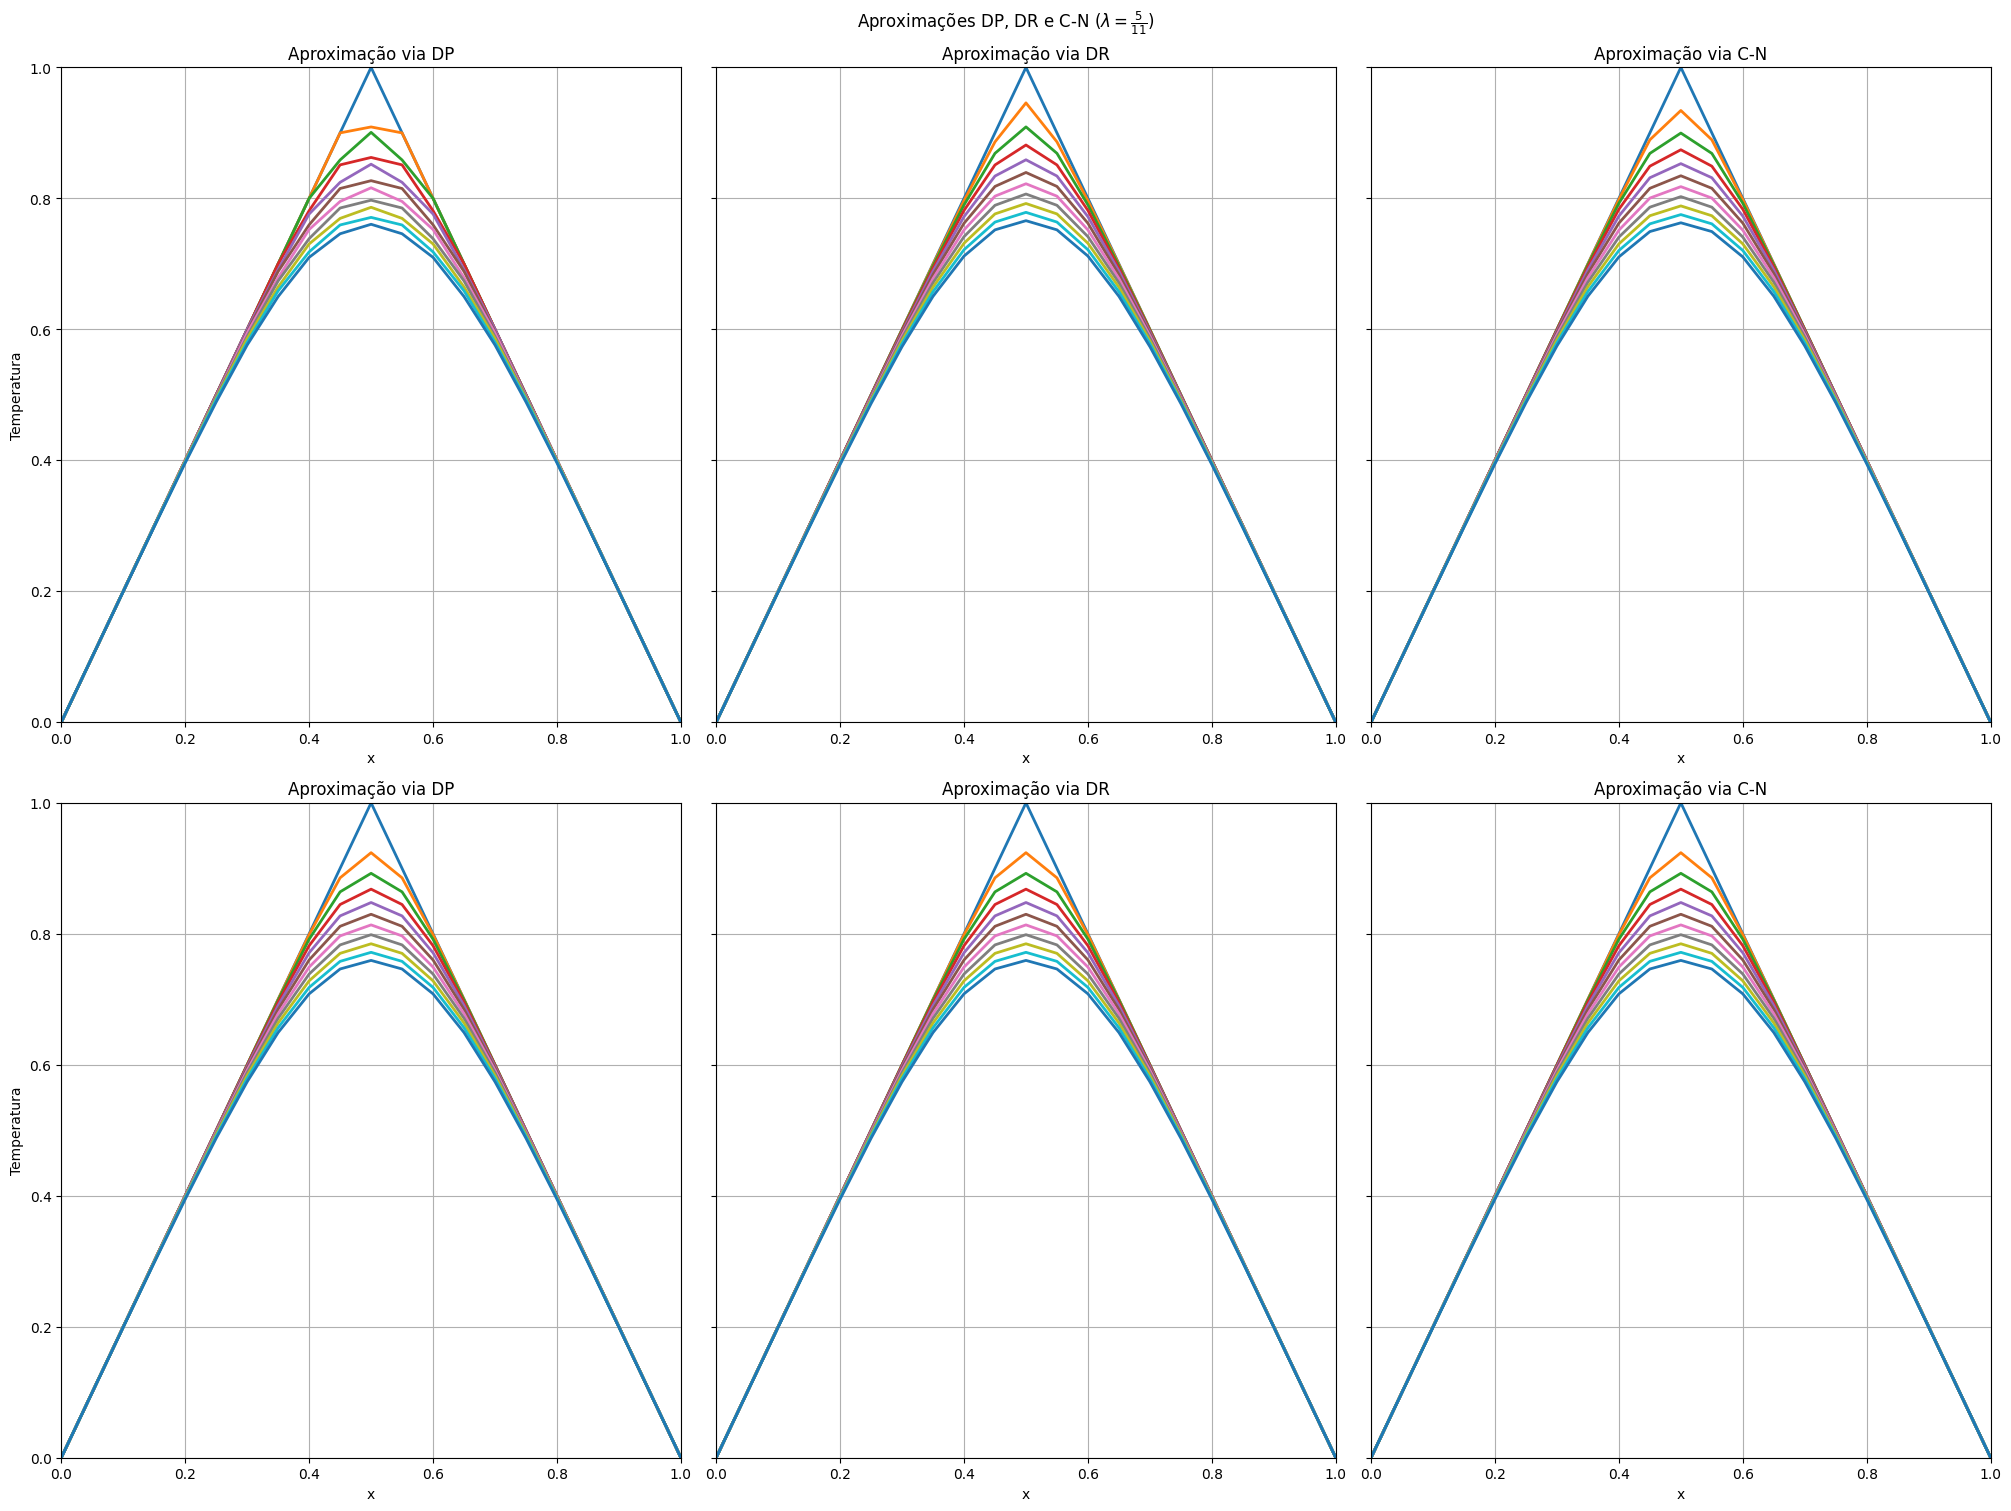

In [13]:

# Plotagem da solução exata junto com as aproximações obtidas.
# Tamanho da figura e janelas
figsize = (20, 15)
colunas = 3
linhas = 2
fig, axs = plt.subplots(linhas, colunas, figsize=figsize, constrained_layout=True,sharey=True)
fig.suptitle(r'Aproximações DP, DR e C-N ($\lambda = \frac{5}{11}$)')
axs[0][0].set_ylabel('Temperatura')
axs[0][0].set_xlabel('x')
axs[0][1].set_xlabel('x')
axs[0][2].set_xlabel('x')
axs[0][0].set_title('Aproximação via DP')
axs[0][1].set_title('Aproximação via DR')
axs[0][2].set_title('Aproximação via C-N')

lamda = 5/11

dx = 1/M
dt = lamda * dx**2

sol_DP = u_DP(lamda, M, N)
sol_DR = u_DR(lamda, M, N)
sol_CN = u_CN(lamda, M, N)

for j in range(0,N+1):
    axs[0][0].plot(malha_x, sol_DP[:,j], linestyle='-', linewidth=2)
    axs[0][1].plot(malha_x, sol_DR[:,j], linestyle='-', linewidth=2)    
    axs[0][2].plot(malha_x, sol_CN[:,j], linestyle='-', linewidth=2)

axs[0][0].set_xlim((0,1))
axs[0][1].set_xlim((0,1))
axs[0][2].set_xlim((0,1))
axs[0][0].set_ylim((0,1))
axs[0][1].set_ylim((0,1))
axs[0][2].set_ylim((0,1))
axs[0][0].grid(True)
axs[0][1].grid(True)
axs[0][2].grid(True)


axs[1][0].set_ylabel('Temperatura')
axs[1][0].set_xlabel('x')
axs[1][1].set_xlabel('x')
axs[1][2].set_xlabel('x')
axs[1][0].set_title('Aproximação via DP')
axs[1][1].set_title('Aproximação via DR')
axs[1][2].set_title('Aproximação via C-N')

sol_DP = fourier_approx(M, lamda, N, f)
sol_DR = fourier_approx(M, lamda, N, f)
sol_CN = fourier_approx(M, lamda, N, f)

for j in range(0,N+1):
    axs[1][0].plot(malha_x, sol_DP[:,j], linestyle='-', linewidth=2)
    axs[1][1].plot(malha_x, sol_DR[:,j], linestyle='-', linewidth=2)    
    axs[1][2].plot(malha_x, sol_CN[:,j], linestyle='-', linewidth=2)

axs[1][0].set_xlim((0,1))
axs[1][1].set_xlim((0,1))
axs[1][2].set_xlim((0,1))
axs[1][0].set_ylim((0,1))
axs[1][1].set_ylim((0,1))
axs[1][2].set_ylim((0,1))
axs[1][0].grid(True)
axs[1][1].grid(True)
axs[1][2].grid(True)

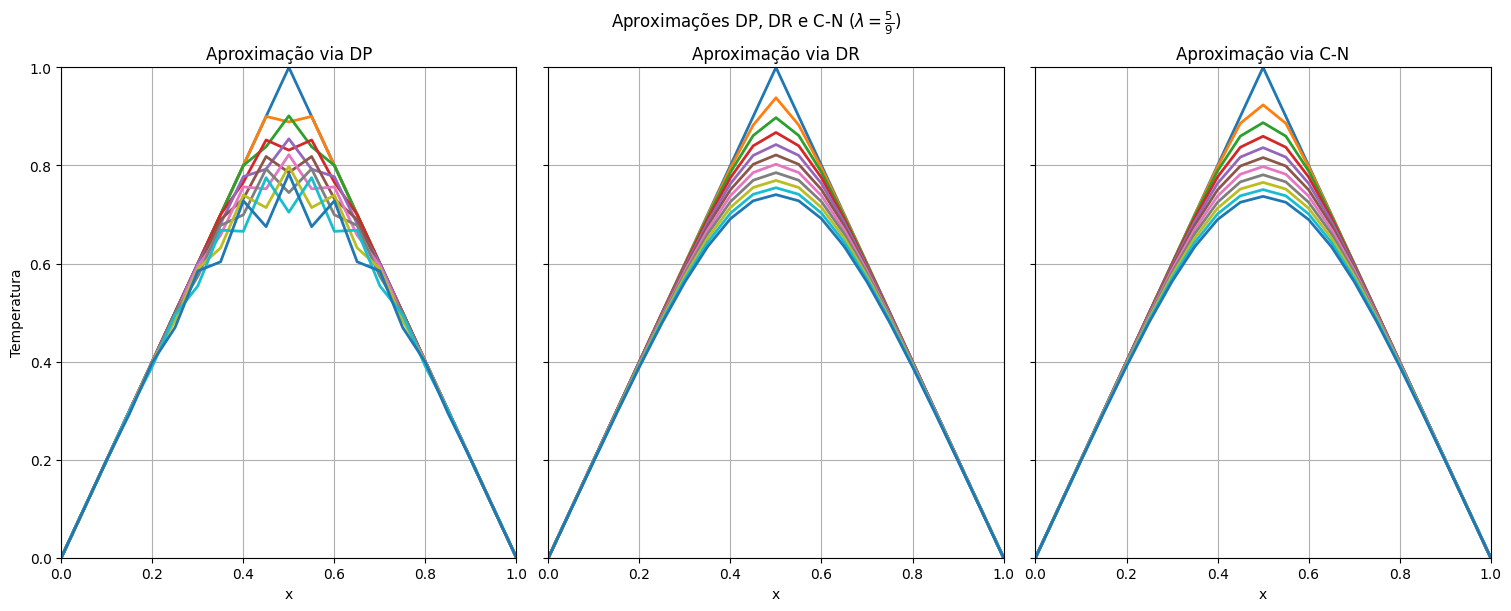

In [14]:
# Plotagem da solução exata junto com as aproximações obtidas.
# Tamanho da figura e janelas
figsize = (15, 6)
colunas = 3
linhas = 1
fig, axs = plt.subplots(linhas, colunas, figsize=figsize, constrained_layout=True,sharey=True)
fig.suptitle(r'Aproximações DP, DR e C-N ($\lambda = \frac{5}{9}$)')
axs[0].set_ylabel('Temperatura')
axs[0].set_xlabel('x')
axs[1].set_xlabel('x')
axs[2].set_xlabel('x')
axs[0].set_title('Aproximação via DP')
axs[1].set_title('Aproximação via DR')
axs[2].set_title('Aproximação via C-N')

lamda = 5/9

sol_DP = u_DP(lamda, M, N)
sol_DR = u_DR(lamda, M, N)
sol_CN = u_CN(lamda, M, N)

for j in range(0,N+1):
    axs[0].plot(malha_x, sol_DP[:,j], linestyle='-', linewidth=2)
    axs[1].plot(malha_x, sol_DR[:,j], linestyle='-', linewidth=2)    
    axs[2].plot(malha_x, sol_CN[:,j], linestyle='-', linewidth=2)

axs[0].set_xlim((0,1))
axs[1].set_xlim((0,1))
axs[2].set_xlim((0,1))
axs[0].set_ylim((0,1))
axs[1].set_ylim((0,1))
axs[2].set_ylim((0,1))
axs[0].grid(True)
axs[1].grid(True)
axs[2].grid(True)